# Gaussian Blur, Medical Images

### Import resources and display image

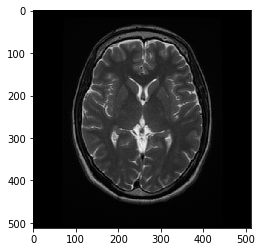

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2

# %matplotlib inline

# # Read in the image
# image = cv2.imread('images/brain_MR.jpg')

# # Make a copy of the image
# image_copy = np.copy(image)

# # Change color to RGB (from BGR)
# image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# plt.imshow(image_copy)

#############################################################

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/brain_MR.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Gaussian blur the image

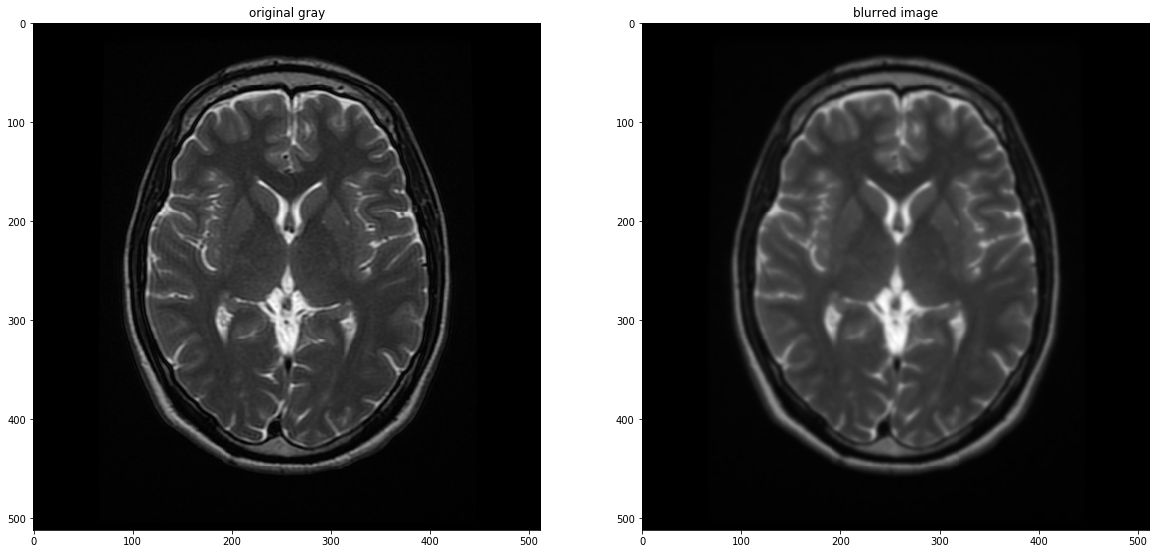

In [2]:
# # Convert to grayscale for filtering
# gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# # Create a Gaussian blurred image
# gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# ax1.set_title('original gray')
# ax1.imshow(gray, cmap='gray')

# ax2.set_title('blurred image')
# ax2.imshow(gray_blur, cmap='gray')

#############################################################

gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
# '0' menyatakan bahwa standard deviasinya dibuat otomatis dari fungsi
gray_blur = cv2.GaussianBlur(gray, (9,9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap = 'gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap = 'gray')

### Test performance with a high-pass filter

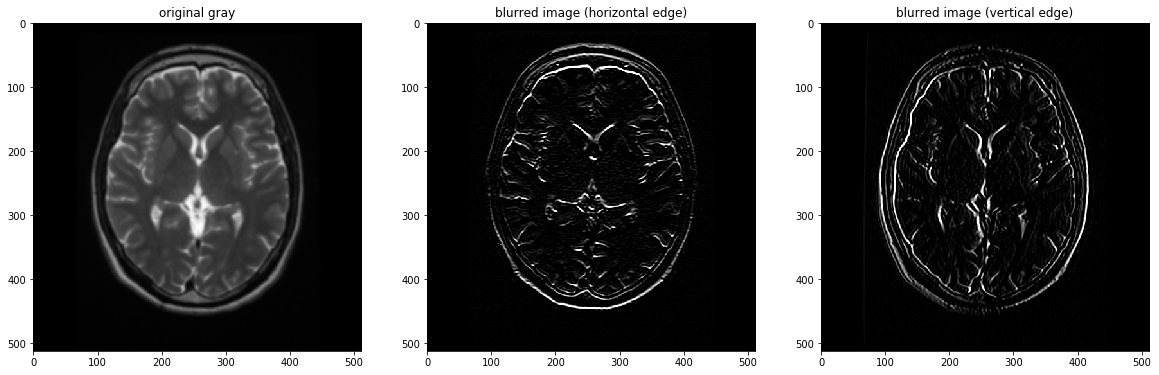

In [6]:
# # High-pass filter 

# # 3x3 sobel filters for edge detection
# sobel_x = np.array([[ -1, 0, 1], 
#                    [ -2, 0, 2], 
#                    [ -1, 0, 1]])


# sobel_y = np.array([[ -1, -2, -1], 
#                    [ 0, 0, 0], 
#                    [ 1, 2, 1]])


# # Filter the orginal and blurred grayscale images using filter2D
# filtered = cv2.filter2D(gray, -1, sobel_x)

# filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# ax1.set_title('original gray')
# ax1.imshow(filtered, cmap='gray')

# ax2.set_title('blurred image')
# ax2.imshow(filtered_blurred, cmap='gray')

#############################################################

sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
sobel_y = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

# '-1' menyatakan bahwa output image secara overall sama dengan input image
filtered_hor = cv2.filter2D(gray, -1, sobel_y)
filtered_ver = cv2.filter2D(gray, -1, sobel_x)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))

ax1.set_title('original gray')
ax1.imshow(gray_blur, cmap = 'gray')

ax2.set_title('blurred image (horizontal edge)')
ax2.imshow(filtered_hor, cmap = 'gray')

ax3.set_title('blurred image (vertical edge)')
ax3.imshow(filtered_ver, cmap = 'gray')


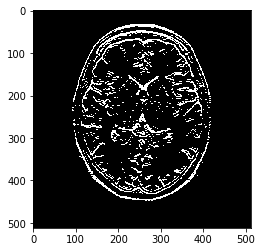

In [13]:
# # Create threshold that sets all the filtered pixels to white
# # Above a certain threshold

# retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

# plt.imshow(binary_image, cmap='gray')

########################################################################################
threshold = 25
maximumval = 255
retval, binary_image = cv2.threshold(filtered_hor, threshold, maximumval, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap = 'gray')

# kalau threshold semakin naik, semakin hilang garis tepinya
# kalau threshold semakin rendah, semakin jelas garis tepinya

In [14]:
retval

25.0